**The Sparks Foundation #GRIPMAR21**


**Prediction using Decision Tree Algorithm**

**Submitted by Ayush Jain**

**Task6: Create the Decision Tree classifier and visualize it graphically.**

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import graphviz
from sklearn import tree


**Load Data**

In [2]:
#Loading Iris dataset
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Preprocessing tha data**

In [3]:
processed_iris_data = iris_data.iloc[:,1:]
processed_iris_data['Species'],class_names = pd.factorize(processed_iris_data['Species'])
print("After Preprocessing")
processed_iris_data.head()

After Preprocessing


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#information of data set
processed_iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**Splitting the data into train and test set**

In [5]:
X = processed_iris_data.iloc[:,:4]
Y = processed_iris_data.iloc[:,4]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)


Shape of X_train:  (112, 4)
Shape of Y_train:  (112,)
Shape of X_test:  (38, 4)
Shape of Y_test:  (38,)


**Training a classifier**

In [6]:
DTC = DecisionTreeClassifier(criterion='entropy')
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Making Predictions**

In [7]:
pred = DTC.predict(X_test)
print("Predicted values of test set are: ",pred)

Predicted values of test set are:  [0 1 1 1 0 1 0 1 2 2 2 0 0 1 2 0 2 0 2 1 1 0 2 0 1 2 0 1 1 0 2 2 1 2 0 1 2
 2]


**Evaluating the Model**

In [8]:
#calculating metrics
print("\nAccuracy score of model is: ",accuracy_score(Y_test,pred))

print("\nConfusion matrix \n",confusion_matrix(Y_test,pred))

print("\n\nClassification report of model\n ",classification_report(Y_test,pred))


Accuracy score of model is:  0.9473684210526315

Confusion matrix 
 [[12  0  0]
 [ 0 11  0]
 [ 0  2 13]]


Classification report of model
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.85      1.00      0.92        11
           2       1.00      0.87      0.93        15

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



**Visualizing the Decision Tree**

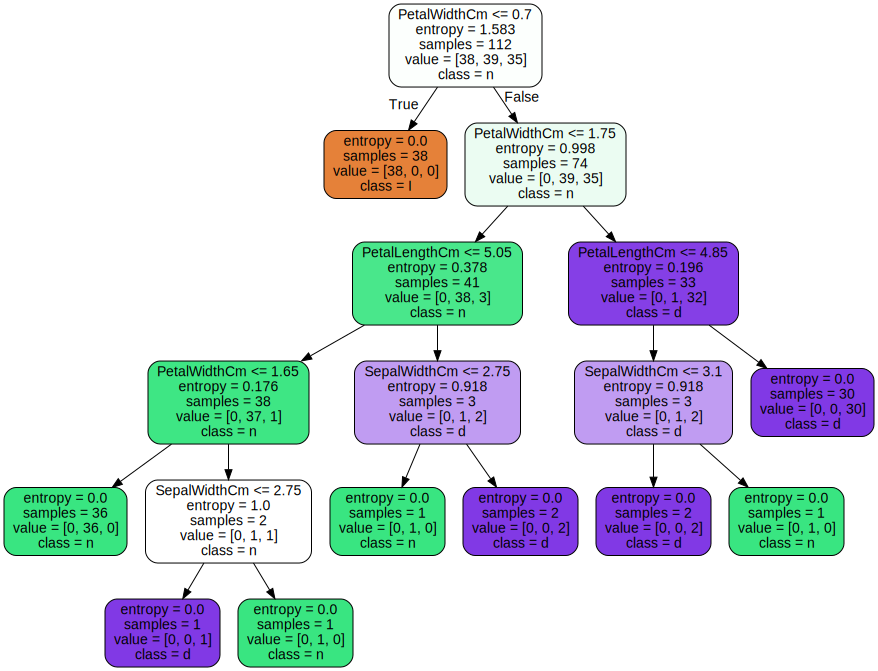

In [9]:
features = list(X.columns)

graph_data = tree.export_graphviz(DTC, out_file=None, filled=True,
                                feature_names=features,  
                                class_names=str(class_names),rounded=True)

graph = graphviz.Source(graph_data)  
graph